## <center>  Module 10 Homework
<center>    Due:  December 2, 2021 at 7:00PM
    
<center> Haotian Liang

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.linear_model import LogisticRegression

In [3]:
#  Function for use in plotting an SVC decision boundary and margins
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

1)  Write a Python function "misclass_rate" that takes as inputs two numpy arrays and returns the misclassification rate.  Check to be sure that the two arrays are of the same length and, if not, return the message "Error - arrays must be of the same length".  (15 points)

In [4]:
y1 =  np.array([0,1,0,1,1])
y1_pred = np.array([0,1,1,1,1])
y2 = np.array([0,1,1,1])
y2_pred = np.array([0,1,1,1,1])

In [5]:
def misclass_rate(a1,a2):
    if len(a1)==len(a2):
        accuracy = accuracy_score(
            a1, a2, normalize=False) / float(a2.size)
        error_rate = 1 - accuracy
        return error_rate
    else: return 'Error - arrays must be of the same length'

In [6]:
misclass_rate(y1,y1_pred)

0.19999999999999996

In [7]:
misclass_rate(y2,y2_pred)

'Error - arrays must be of the same length'

2a)  The code below defines a two-dimensional dataset (X1) that has good separation between its two classes (y1).  Create a scatterplot that is color coded by classificaiton using the matplotlib plt.scatter command.  (5 points)

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
X1 = iris["data"][:, (2, 3)] 
y1 = iris["target"]
X1 = X1[(y1==1) | (y1==2)]
y1 = y1[(y1==1) | (y1==2)]

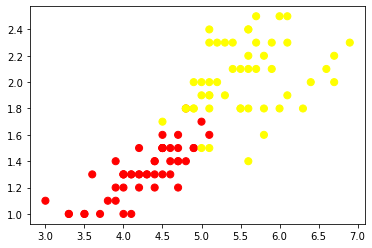

In [9]:
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn');

2b)  Perform an SVM classification on this dataset using the SVC function in the sklearn.svm library.  Use a liner kernel and set the value of the regularization term (C) to 1000.  Use the plot_svc_decision_function defined earlier in this notebook to plot the decision boundary and the margin.  (10 points)

In [10]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1000)
model.fit(X1, y1)

SVC(C=1000, kernel='linear')

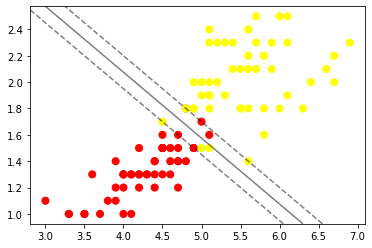

In [11]:
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn')
plot_svc_decision_function(model)

2c)  What points are the support vectors?  (5 points)

In [12]:
model.support_vectors_

array([[4.9, 1.5],
       [4.7, 1.6],
       [4.8, 1.8],
       [4.9, 1.5],
       [5. , 1.7],
       [5.1, 1.6],
       [4.5, 1.7],
       [5. , 1.5],
       [4.8, 1.8],
       [5.1, 1.5],
       [5.6, 1.4],
       [4.8, 1.8]])

2d)  What is the misclassification rate for this classifier? (5 points)

In [13]:
misclass_rate(y1,model.predict(X1))

0.06000000000000005

2e)  What would be the prediction for the point [5.1, 1.5]?  (5 points)

In [14]:
model.predict([[5.1,1.5]])

array([1])

2f)  Now we will repeat the process but using a regularization term of C=1.  Perform the SVM classification and plot the new discision boundary and margins.  (10 points)

In [15]:
model_1 = SVC(kernel='linear', C=1)
model_1.fit(X1, y1)

SVC(C=1, kernel='linear')

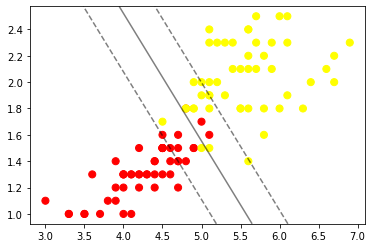

In [16]:
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn')
plot_svc_decision_function(model_1)

2g)  What points are the support vectors?  (5 points)

In [17]:
model_1.support_vectors_

array([[4.7, 1.4],
       [4.9, 1.5],
       [4.6, 1.5],
       [4.7, 1.6],
       [4.7, 1.4],
       [4.8, 1.8],
       [4.9, 1.5],
       [4.8, 1.4],
       [5. , 1.7],
       [5.1, 1.6],
       [4.5, 1.6],
       [4.7, 1.5],
       [4.5, 1.7],
       [5. , 1.5],
       [4.9, 2. ],
       [4.9, 1.8],
       [4.8, 1.8],
       [4.9, 1.8],
       [5.1, 1.5],
       [5.6, 1.4],
       [4.8, 1.8],
       [5.1, 1.9],
       [5. , 1.9],
       [5.1, 1.8]])

2g)  What is the misclassification rate? (5 points)

In [18]:
misclass_rate(y1,model_1.predict(X1))

0.050000000000000044

2h)  What would be the prediction for the point [5.1, 1.5]?  (5 points)

In [19]:
model_1.predict([[5.1,1.5]])

array([2])

2i)  Fit a logistic regression model to this data.  What is the probability of the two states for the point [5.1, 1.5]?  (10 points)

In [20]:
model_log= LogisticRegression(solver='liblinear', random_state=0)

In [21]:
model_log.fit(X1,y1)

LogisticRegression(random_state=0, solver='liblinear')

In [22]:
model_log.predict_proba([[5.1,1.5]])

array([[0.55844348, 0.44155652]])

In [23]:
model_log.predict([[5.1,1.5]])

array([1])

3)  Polynomial SVM Classification.  For this problem we are going to fit an SVM classifier to the dataset generated by the code below.

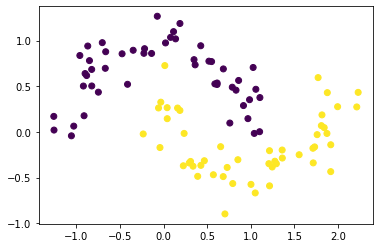

In [24]:
from sklearn.datasets import make_moons
X2, y2 = make_moons(n_samples=100, noise=0.15, random_state=1)
plt.scatter(X2[:,0], X2[:,1], c=y2)

3a)  Try fitting this dataset using the linear kernel and a C=1 parameter.  Plot the dataset and the decision boundary and margins using the plot_svc_decision_function.  Call your missclass_rate funciton to calculate the misclassification rate. (15 points)

In [25]:
model_2 = SVC(kernel='linear', C=1)
model_2.fit(X2, y2)


SVC(C=1, kernel='linear')

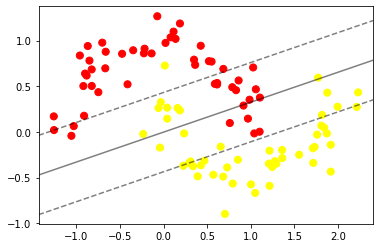

In [26]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='autumn')
plot_svc_decision_function(model_2)

In [27]:
misclass_rate(y1,model_2.predict(X1))

0.63

3b)  Now try fitting this dataset using a polymonial kerner of degree 3 and the C=1 parameter.   Plot the dataset and the decision boundary and margins using the plot_svc_decision_function. Call your missclass_rate funciton to calculate the misclassification rate.  (15 points)

In [28]:
model_3 = SVC(kernel='poly', degree=3,C=1)
model_3.fit(X2, y2)

SVC(C=1, kernel='poly')

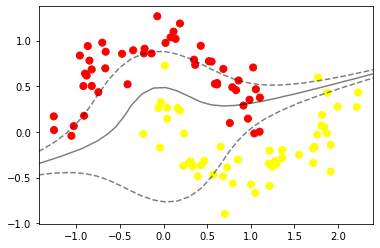

In [29]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='autumn')
plot_svc_decision_function(model_3)

In [30]:
misclass_rate(y2,model_3.predict(X2))

0.06999999999999995